In [1]:
%matplotlib inline
%config IPython.matplotlib.backend = "retina"
import matplotlib.pyplot as plt
import numpy as np
import sys
import astropy.units as u
from astropy.io import ascii, fits

In [3]:
f = fits.open('spex_prism_2306-5008_170625.fits')

wavelength = f[0].data[0, :] * u.um
flux = f[0].data[1, :] * u.erg * u.s**-1 * u.cm**-2 * u.Angstrom**-1
flux = flux.to(u.W * u.m**-2 * u.um**-1)
flux[flux < 0] = 0

 ############################## Xspextool History ############################## [astropy.io.fits.card]
 ############################## Xcombspec History ############################## [astropy.io.fits.card]
 ############################### Xtellcor History ############################## [astropy.io.fits.card]
/Users/bmmorris/anaconda/lib/python3.5/site-packages/astropy-3.0.dev19880-py3.5-macosx-10.6-x86_64.egg/astropy/units/quantity.py:641: RuntimeWarning: invalid value encountered in less
  *arrays, **kwargs)


(0.1, 3)

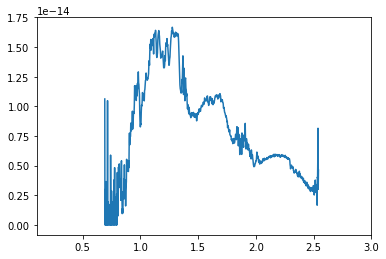

In [4]:
#plt.plot(phoenix_wavelengths, coolstar/coolstar.max())

plt.plot(wavelength, flux)

plt.xlim([0.1, 3])

In [5]:
from synphot import units, SourceSpectrum, Empirical1D, Observation

from synphot import SpectralElement

#bp_v = SpectralElement.from_filter('johnson_v')
bp_i = SpectralElement.from_filter('cousins_i')
bp_r = SpectralElement.from_filter('cousins_r')

# m8v.wavelength = u.Quantity(np.concatenate([m8v.wavelength[:6940].value, m8v.wavelength[:6941].value]), u.um)
# m8v.flux = np.concatenate([m8v.flux[:6940], m8v.flux[:6941]])
sp = SourceSpectrum(Empirical1D, points=wavelength, lookup_table=flux)

#obs_v = Observation(sp, bp_v, force='extrap')
obs_r = Observation(sp, bp_r, force='extrap')
obs_i = Observation(sp, bp_i, force='extrap')

/Users/bmmorris/anaconda/lib/python3.5/site-packages/synphot/models.py:347: RuntimeWarning: invalid value encountered in less
  i = np.where(y < 0)


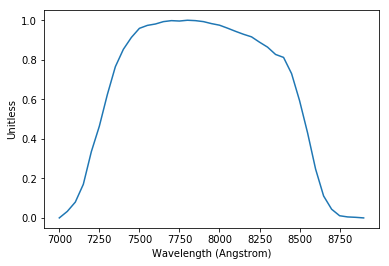

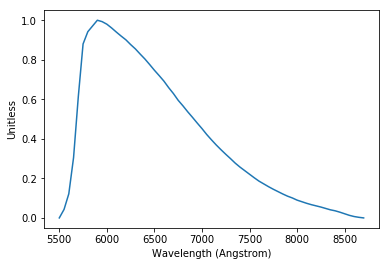

In [6]:
bp_i.plot()
bp_r.plot()

In [7]:
R = 16.6 
I = 14.0

print(R - I)

2.6000000000000014


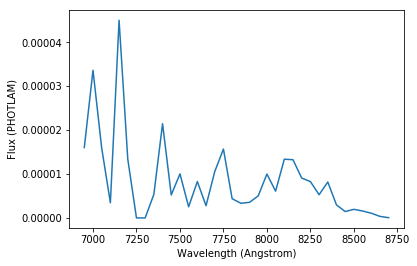

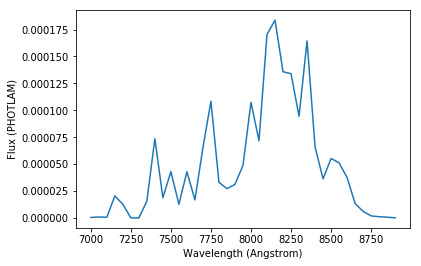

In [9]:
obs_r.plot()
obs_i.plot()

In [11]:
obs_r.effstim('vegamag') - obs_i.effstim('vegamag')

/Users/bmmorris/anaconda/lib/python3.5/site-packages/synphot/models.py:347: RuntimeWarning: invalid value encountered in less
  i = np.where(y < 0)


SynphotError: Vega spectrum is missing.

(1000, 40000)

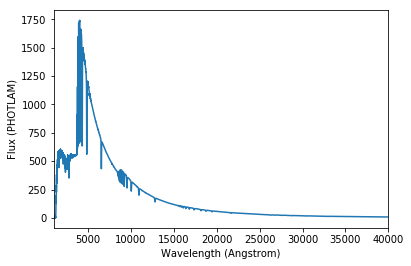

In [14]:
from synphot import SourceSpectrum

v = SourceSpectrum.from_vega()
v.plot()
plt.xlim([1000, 40000])